In [1]:
import numpy as np
import pandas as pd
import mat73
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times
from lifelines.statistics import logrank_test
# %matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import scipy.io as sio
from lifelines.statistics import multivariate_logrank_test
from statsmodels.stats.multitest import multipletests
from scipy import stats
from scipy.stats import chi2_contingency

import numpy.matlib
import scipy


In [3]:
km_clinical_data_df = pd.read_csv("km_pfs_data_669.csv")

In [4]:
censorlist = km_clinical_data_df['death_flag_list'].values
km_clinical_data_df['days_since_last_visit_list'] = km_clinical_data_df['days_since_last_visit_list'].fillna(-1)
event_duration = km_clinical_data_df['days_since_last_visit_list'].values/365

In [5]:
np.sum(km_clinical_data_df['mask_list'])

659

In [6]:
missing_subject_list = ['MMRF_2903','MMRF_2905','MMRF_2908','MMRF_2914','MMRF_2926',\
                        'MMRF_2938', 'MMRF_2939', 'MMRF_2941', 'MMRF_2946', 'MMRF_2947']

In [7]:
patient_list = pd.read_csv('subject_list_669.csv')

In [8]:
patient_list = patient_list['0'].values

In [9]:
patient_list = patient_list[1:]

In [10]:
number_of_patients = len(patient_list)

In [11]:
patients_mask = np.ones(number_of_patients,)
for n, patient_id in enumerate(patient_list): 
    if patient_id[0:9] in missing_subject_list: 
        patients_mask[n] = 0

patients_mask = patients_mask > 0

In [12]:
len(missing_subject_list)

10

In [13]:
for n, event in enumerate(event_duration): 
    if event < 0: 
        patients_mask[n] = 0
        
patients_mask = patients_mask > 0

In [14]:
sum(patients_mask)

659

In [15]:
event_duration = event_duration[patients_mask]

In [16]:
len(event_duration) 

659

In [17]:
censorlist = censorlist[patients_mask]

In [18]:
def get_cluster_summary(labels, clinical_data_df): 
    print("Number of clusters: ", len(np.unique(labels)))
    for n in np.unique(labels): 
        print("---- Cluster ", n, "-----")
        print('Age: ', np.round(np.mean(clinical_data_df[labels==n]['age_list'].values), 2), \
             "+/-", np.round(np.std(clinical_data_df[labels==n]['age_list'].values), 2))
        print("Sex: ")
        print(clinical_data_df[labels==n]['gender_list'].value_counts()) 
        print("ISS Stage: ")
        print(clinical_data_df[labels==n]['iss_list'].value_counts()) 
        print("Therapy: ")
        print(clinical_data_df[labels==n]['therapy_list'].value_counts()) 
        print()
        

In [20]:
# # CNA 
data_dict = mat73.loadmat("/Users/anish/Documents/MSKCC/multiple-myeloma/matlab/scalar_curvature/overall_curvature_april18_cna.mat")
overall_curvature = data_dict['overall_curvature']

In [21]:
overall_curvature = overall_curvature[:, patients_mask]

In [22]:
print(overall_curvature.shape)

(33695, 659)


In [23]:
average_sil_list = [] 
num_clusters = 20

X = overall_curvature.T

for n_clusters in range(2, num_clusters):

    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    output = multivariate_logrank_test(event_duration, cluster_labels, censorlist)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,)
    average_sil_list.append(silhouette_avg)
    print('silhouette score: ', silhouette_avg, 'log rank p-value: ', output.p_value)

/Users/anish/opt/anaconda3/envs/myeloma/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


For n_clusters = 2
silhouette score:  0.144010507898653 log rank p-value:  0.23971021498150197


/Users/anish/opt/anaconda3/envs/myeloma/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


For n_clusters = 3
silhouette score:  0.11231802275530199 log rank p-value:  0.491756257226724


/Users/anish/opt/anaconda3/envs/myeloma/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


For n_clusters = 4
silhouette score:  0.07478266343337009 log rank p-value:  0.4433873822198253


/Users/anish/opt/anaconda3/envs/myeloma/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


For n_clusters = 5
silhouette score:  0.043500306842205926 log rank p-value:  0.13407681762618362


/Users/anish/opt/anaconda3/envs/myeloma/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


For n_clusters = 6
silhouette score:  0.04863956401473661 log rank p-value:  0.1806608408774601


/Users/anish/opt/anaconda3/envs/myeloma/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


For n_clusters = 7
silhouette score:  0.05159550323607419 log rank p-value:  0.014542220858524416


/Users/anish/opt/anaconda3/envs/myeloma/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


For n_clusters = 8
silhouette score:  0.05320408541175833 log rank p-value:  0.00819913847017012


/Users/anish/opt/anaconda3/envs/myeloma/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


For n_clusters = 9
silhouette score:  0.03291857726320827 log rank p-value:  0.0026144849608351365


/Users/anish/opt/anaconda3/envs/myeloma/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


For n_clusters = 10
silhouette score:  0.037835811148870906 log rank p-value:  0.0036371759472817056


/Users/anish/opt/anaconda3/envs/myeloma/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


For n_clusters = 11
silhouette score:  0.040046245256743204 log rank p-value:  0.0016553544038469543


/Users/anish/opt/anaconda3/envs/myeloma/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


For n_clusters = 12
silhouette score:  0.042353906798811035 log rank p-value:  0.0007917633365541394


/Users/anish/opt/anaconda3/envs/myeloma/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


For n_clusters = 13
silhouette score:  0.04597860903353999 log rank p-value:  0.0012557728101131997


/Users/anish/opt/anaconda3/envs/myeloma/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


For n_clusters = 14
silhouette score:  0.049494033540300776 log rank p-value:  0.0021501982945992064


/Users/anish/opt/anaconda3/envs/myeloma/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


For n_clusters = 15
silhouette score:  0.05252168072354015 log rank p-value:  0.001580106466373077


/Users/anish/opt/anaconda3/envs/myeloma/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


For n_clusters = 16
silhouette score:  0.03797294082163112 log rank p-value:  0.002621077196404399


/Users/anish/opt/anaconda3/envs/myeloma/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


For n_clusters = 17
silhouette score:  0.04038445490164933 log rank p-value:  0.0033116819360624575


/Users/anish/opt/anaconda3/envs/myeloma/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


For n_clusters = 18
silhouette score:  0.042923219839572174 log rank p-value:  0.0016093122923403792
For n_clusters = 19
silhouette score:  0.04363785361313509 log rank p-value:  0.0025373269510597833


/Users/anish/opt/anaconda3/envs/myeloma/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [ ]:
%matplotlib widget

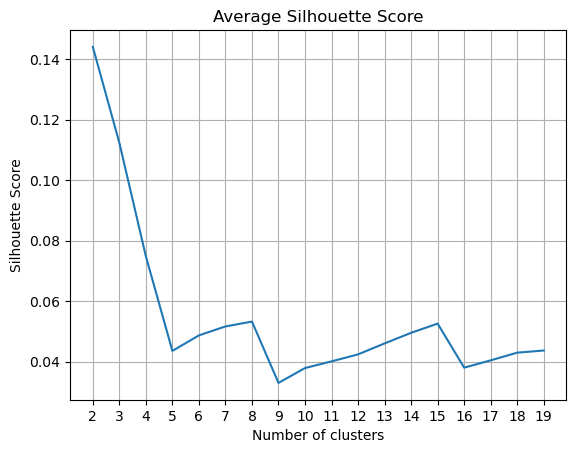

In [24]:
plt.figure()
plt.plot(list(range(2, num_clusters)), average_sil_list)
plt.xticks(list(range(2, num_clusters)))
plt.title('Average Silhouette Score')
plt.ylabel('Silhouette Score')
plt.xlabel('Number of clusters')
plt.grid("on")

In [26]:
selected_patient_list = patient_list[patients_mask==True]
clinical_data_df = pd.read_csv('km_clinical_data_669.csv')
clinical_data_df = clinical_data_df[clinical_data_df['subjectIDlist'].isin(selected_patient_list)]
clinical_data_df = clinical_data_df.reset_index()

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([192,  78,  47,  90,  98,  41,  69,  44]))
0.00819913847017012
0 3.3753424657534246  years
1 2.841095890410959  years
2 2.589041095890411  years
3 2.9972602739726026  years
4 3.2794520547945205  years
5 4.232876712328767  years
6 1.7095890410958905  years
7 4.435616438356164  years


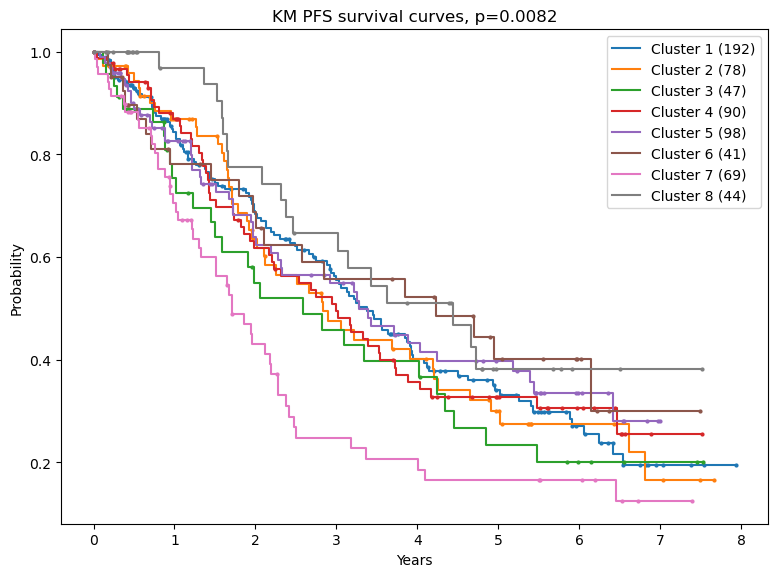

In [27]:
number_of_clusteres = 8

model = AgglomerativeClustering(n_clusters=number_of_clusteres)
labels = model.fit_predict(overall_curvature.T)
print(np.unique(labels, return_counts=True))

plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

output = multivariate_logrank_test(event_duration, labels, censorlist)
print(output.p_value)

kmf = KaplanMeierFitter()
for ncluster in range(0, number_of_clusteres): 
    kmf.fit(event_duration[labels==ncluster],\
            censorlist[labels==ncluster], label="Cluster "+str(ncluster + 1)+ " ("+ str(sum(labels==ncluster)) +")")
    
    kmf.plot_survival_function(ax=ax,  show_censors=True,\
                               censor_styles={'ms': 2, 'marker': 'o'}, ci_show=False)
    
    print(ncluster, kmf.median_survival_time_, ' years')
plt.title("KM PFS survival curves, p=" + str(np.round(output.p_value, 5)));
plt.xlabel('Years')
plt.ylabel('Probability')


plt.rcParams.update({'font.size': 14})
plt.tight_layout()

plt.savefig('CNA_PFS_results.png', dpi=300)

In [28]:
pd.DataFrame(list(zip(selected_patient_list, labels)), columns=['PatientID', 'cluster_label']).to_csv('CNA_cluster_labels.csv')

In [29]:
def examine_cluster_pairs(labels, clinical_data_df, selected_patient_list, best_cluster, worst_cluster): 
    print("Number of subjects in best cluster: ", np.sum(labels==best_cluster))
    print("Number of subjects in worst cluster: ", np.sum(labels==worst_cluster))

    age_list1 = clinical_data_df[labels==best_cluster]['age_list'].values
    age_list2 = clinical_data_df[labels==worst_cluster]['age_list'].values
    result = stats.ttest_ind(age_list1, age_list2)
    print('Age pvalue: ', result.pvalue)
    vcounts1 = clinical_data_df[labels==best_cluster]['iss_list'].value_counts()
    vcounts1 = vcounts1.sort_index()
    vcounts1 = vcounts1.values
    
    vcounts2 = clinical_data_df[labels==worst_cluster]['iss_list'].value_counts()
    vcounts2 = vcounts2.sort_index()
    vcounts2 = vcounts2.values
    # result = stats.chisquare(vcounts1, vcounts2)
    print("best_group: ",vcounts1, "worst_group: ", vcounts2)
    # print('iss stage pvalue: ', result.pvalue)

In [30]:
####

In [31]:
best_cluster=7
worst_cluster=6

In [32]:
worstcluster_inds = labels==worst_cluster
worstcluster_inds = labels*worstcluster_inds

bestcluster_inds = labels==best_cluster
bestcluster_inds = labels*bestcluster_inds

best_worst_inds = bestcluster_inds+worstcluster_inds
binary_inds = best_worst_inds > 0
output = multivariate_logrank_test(event_duration[binary_inds==True],\
                                   labels[binary_inds==True], censorlist[binary_inds==True])
print(output.p_value)

0.0005596436310300773


In [33]:
worstcluster_inds = worstcluster_inds > 0

In [34]:
bestcluster_inds = ~worstcluster_inds

In [35]:
np.sum(bestcluster_inds)

590

In [36]:
worstcluster_inds = 1*worstcluster_inds

In [37]:
output = multivariate_logrank_test(event_duration,\
                                   worstcluster_inds, censorlist)

In [38]:
output.p_value

0.00010868397338033044

1 1.7095890410958905  years
0 3.221917808219178  years


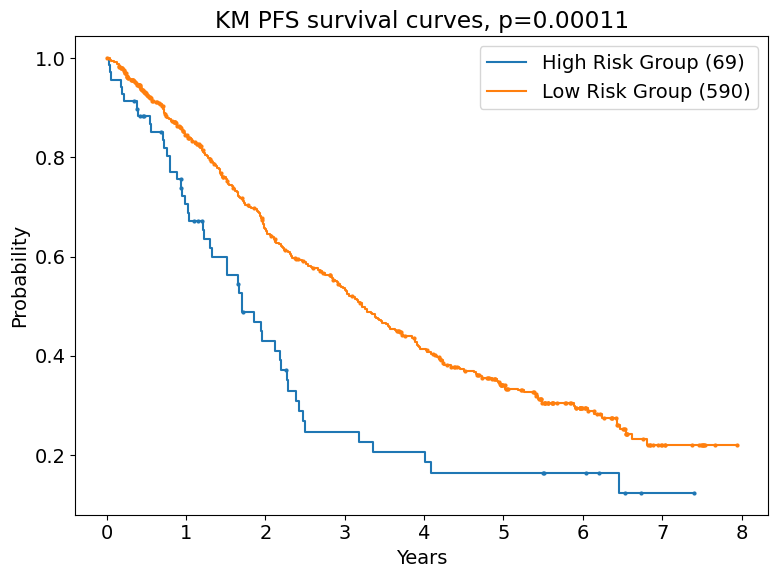

In [39]:
label_list = ["High Risk Group", "Low Risk Group"]
labelind = 0
plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
kmf = KaplanMeierFitter()
for ncluster in [1, 0]: 
    kmf.fit(event_duration[worstcluster_inds==ncluster],\
            censorlist[worstcluster_inds==ncluster], label=label_list[labelind] + \
            " ("+ str(sum(worstcluster_inds==ncluster)) +")")
    labelind = labelind + 1
    kmf.plot_survival_function(ax=ax,  show_censors=True,\
                               censor_styles={'ms': 2, 'marker': 'o'}, ci_show=False)
    print(ncluster, kmf.median_survival_time_, ' years')
plt.title("KM PFS survival curves, p=" + str(np.round(output.p_value, 5)));
plt.xlabel('Years')
plt.ylabel('Probability')


plt.rcParams.update({'font.size': 14})
plt.tight_layout()

plt.savefig('CNA_PFS_bestworst_results.png', dpi=300)

In [40]:
examine_cluster_pairs(labels, clinical_data_df, selected_patient_list, best_cluster, worst_cluster)

Number of subjects in best cluster:  44
Number of subjects in worst cluster:  69
Age pvalue:  0.9655006157547915
best_group:  [12 17 14] worst_group:  [17 27 24]


In [41]:
for n in range(0, 8): 
    vcounts2 = clinical_data_df[labels==n]['iss_list'].value_counts()
    vcounts2 = vcounts2.sort_index()
    vcounts2 = vcounts2.values
    # result = stats.chisquare(vcounts1, vcounts2)
    print("group ", str(n+1), ": ", vcounts2/np.sum(vcounts2))

group  1 :  [0.36898396 0.35294118 0.27807487]
group  2 :  [0.36842105 0.36842105 0.26315789]
group  3 :  [0.40425532 0.27659574 0.31914894]
group  4 :  [0.38372093 0.3255814  0.29069767]
group  5 :  [0.43010753 0.38709677 0.1827957 ]
group  6 :  [0.275 0.425 0.3  ]
group  7 :  [0.25       0.39705882 0.35294118]
group  8 :  [0.27906977 0.39534884 0.3255814 ]


In [44]:
gene_data_df = pd.read_excel('../data/MMRF_clin_abbrev_2021_0910.xlsx')
better_subject_ids = selected_patient_list[worstcluster_inds==0]
worse_subject_ids = selected_patient_list[worstcluster_inds==1]

In [45]:
gene_data_df

,sample,age,gender,pfs_code,pfs_time,os_code,os_time,HRD,gain1q21,ampMYC,t_CCND1,t_MMSET,any_MAF,t_MYC,TP53sum,chromothripsis_code
0,MMRF_1016_1_BM,56.0,MALE,0.0,673.0,1.0,692.0,1.0,0.0,0.0,0.0,1.0,0,0.0,0.0,1
1,MMRF_1021_1_BM,54.0,FEMALE,1.0,532.0,0.0,2135.0,0.0,1.0,0.0,0.0,1.0,0,0.0,0.0,0
2,MMRF_1029_1_BM,46.0,MALE,0.0,995.0,0.0,995.0,1.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0
3,MMRF_1030_1_BM,65.0,FEMALE,1.0,1983.0,0.0,2143.0,1.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0
4,MMRF_1031_1_BM,62.0,MALE,1.0,1329.0,1.0,1670.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,MMRF_2754_1_BM,NaN,NaN,NaN,1.0,1.0,8.0,0.0,1.0,0.0,1.0,0.0,0,0.0,0.0,0
748,MMRF_2755_1_BM,NaN,NaN,0.0,152.0,0.0,152.0,1.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0
749,MMRF_2756_1_BM,NaN,NaN,0.0,344.0,0.0,344.0,1.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0
750,MMRF_2757_1_BM,NaN,NaN,0.0,359.0,0.0,359.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0


In [46]:
better_subject_ids_filt = [] 
for subjid in better_subject_ids: 
    better_subject_ids_filt.append(subjid[0:-9])
    
worse_subject_ids_filt = [] 
for subjid in worse_subject_ids: 
    worse_subject_ids_filt.append(subjid[0:-9])
    
better_df = gene_data_df[gene_data_df['sample'].isin(better_subject_ids_filt)]
worse_df = gene_data_df[gene_data_df['sample'].isin(worse_subject_ids_filt)]

columns = ['HRD', 't_MMSET', 't_CCND1', 'any_MAF', 't_MYC', 'chromothripsis_code']

tricol = ['gain1q21', 'TP53sum']

for genecol in columns: 
    print(genecol)
    print(better_df[genecol].value_counts().sort_index())
    print(worse_df[genecol].value_counts().sort_index())
    
        
    array1 = better_df[genecol].value_counts().sort_index()
    array2 = worse_df[genecol].value_counts().sort_index()
    
    
    if len(array1) == 1: 
        a1 = np.zeros((2,))
        if array1.index[0] == 0: 
            a1[0] = array1[0]
        if array1.index[0] == 1: 
            a1[1] = array1[0]
        array1 = a1
    else: 
        array1 = array1.values
        
    if len(array2) == 1: 
        a2 = np.zeros((2,))
        if array2.index[0] == 0: 
            a2[0] = array2[0]
        if array2.index[0] == 1: 
            a2[1] = array1[0]
        array2 = a2
    else: 
        array2 = array2.values
        
        
        
    print('better outcomes', array1, np.sum(array1))
    print('worse outcomes', array2, np.sum(array2))
    
    
    table = np.array([array1, array2])                  
    oddsr, p  = stats.fisher_exact(table)                
#         result = stats.chisquare(better_df[genecol].value_counts().sort_index().values,\
#                              worse_df[genecol].value_counts().sort_index().values)
    
    print(p)
 
    print("----------------")
    
    

for genecol in tricol: 
    print(genecol)
    print(better_df[genecol].value_counts().sort_index())
    print(worse_df[genecol].value_counts().sort_index())
    print("----------------")




HRD
0.0    185
1.0    306
Name: HRD, dtype: int64
0.0    45
1.0     7
Name: HRD, dtype: int64
better outcomes [185 306] 491
worse outcomes [45  7] 52
8.219828497239178e-12
----------------
t_MMSET
0.0    466
1.0     55
Name: t_MMSET, dtype: int64
0.0    34
1.0    24
Name: t_MMSET, dtype: int64
better outcomes [466  55] 521
worse outcomes [34 24] 58
2.2128631693780475e-08
----------------
t_CCND1
0.0    424
1.0     97
Name: t_CCND1, dtype: int64
0.0    45
1.0    13
Name: t_CCND1, dtype: int64
better outcomes [424  97] 521
worse outcomes [45 13] 58
0.4821077788641359
----------------
any_MAF
0    502
1     19
Name: any_MAF, dtype: int64
0    43
1    15
Name: any_MAF, dtype: int64
better outcomes [502  19] 521
worse outcomes [43 15] 58
7.553156673621191e-08
----------------
t_MYC
0.0    436
1.0     85
Name: t_MYC, dtype: int64
0.0    47
1.0    11
Name: t_MYC, dtype: int64
better outcomes [436  85] 521
worse outcomes [47 11] 58
0.5794325251368767
----------------
chromothripsis_code
0    3

In [47]:
table = np.array([[369, 109, 13], [2, 33, 17]])                  
stat, p, dof, expected = chi2_contingency(table)

In [48]:
p

1.180386729173354e-31

In [49]:
table = np.array([[375, 48, 17], [43, 5, 1]])                  
stat, p, dof, expected = chi2_contingency(table)

In [50]:
p

0.7980531941538067

In [51]:
better_subj_output = clinical_data_df[clinical_data_df['subjectIDlist'].isin(better_subject_ids)]['gender_list'].value_counts()
worse_subj_output = clinical_data_df[clinical_data_df['subjectIDlist'].isin(worse_subject_ids)]['gender_list'].value_counts()
table = np.array([[worse_subj_output[1], worse_subj_output[2]], [better_subj_output[1], better_subj_output[2]]])                  
oddsr, p  = stats.fisher_exact(table)

In [52]:
better_subj_output, worse_subj_output, p

(1    343
 2    247
 Name: gender_list, dtype: int64,
 1    50
 2    19
 Name: gender_list, dtype: int64,
 0.02692532944410562)

In [53]:
better_subj_output = clinical_data_df[clinical_data_df['subjectIDlist'].isin(better_subject_ids)]['iss_list'].value_counts()


In [54]:
better_subj_output

1.0    212
2.0    205
3.0    155
Name: iss_list, dtype: int64

In [55]:
worse_subj_output = clinical_data_df[clinical_data_df['subjectIDlist'].isin(worse_subject_ids)]['iss_list'].value_counts()


In [56]:
worse_subj_output

2.0    27
3.0    24
1.0    17
Name: iss_list, dtype: int64

In [57]:
table = np.array([[better_subj_output[1], better_subj_output[2], better_subj_output[3]],\
                  [worse_subj_output[1], worse_subj_output[2], worse_subj_output[3]]])                  
stat, p, dof, expected = chi2_contingency(table)

In [58]:
p

0.12356314143055358

In [59]:
better_subj_output = clinical_data_df[clinical_data_df['subjectIDlist'].isin(better_subject_ids)]['age_list'].values


In [60]:
worse_subj_output = clinical_data_df[clinical_data_df['subjectIDlist'].isin(worse_subject_ids)]['age_list'].values


In [61]:
np.mean(better_subj_output), np.std(better_subj_output)

(62.42203389830509, 10.754889590346608)

In [62]:
np.mean(worse_subj_output), np.std(worse_subj_output)

(63.47826086956522, 9.749929313236404)

In [63]:
scipy.stats.ttest_ind(better_subj_output, worse_subj_output)


TtestResult(statistic=-0.7780148632717997, pvalue=0.43684033209023665, df=657.0)

In [64]:
clinical_data_df[clinical_data_df['subjectIDlist'].isin(better_subject_ids)]['therapy_list'].value_counts()


combined bortezomib/IMIDs-based                281
Bortezomib-based                               125
combined IMIDs/carfilzomib-based                98
Carfilzomib-based                               34
IMIDs-based                                     30
combined bortezomib/IMIDs/carfilzomib-based     21
combined bortezomib/carfilzomib-based            1
Name: therapy_list, dtype: int64

In [65]:
clinical_data_df[clinical_data_df['subjectIDlist'].isin(worse_subject_ids)]['therapy_list'].value_counts()


combined bortezomib/IMIDs-based                36
Bortezomib-based                               13
combined IMIDs/carfilzomib-based               12
Carfilzomib-based                               4
IMIDs-based                                     2
combined bortezomib/IMIDs/carfilzomib-based     2
Name: therapy_list, dtype: int64

In [86]:
secondary_dataset_df = pd.read_excel('../data/MMRF_clin_IA13_to_Anish.xlsx')
gene_cols_list = secondary_dataset_df.columns[9:]
output_df = pd.DataFrame(columns=gene_cols_list, index=list(range(0, number_of_clusteres)))

for cluster_n in range(0, number_of_clusteres):
    cluster_inds = labels==cluster_n
    better_subject_ids = selected_patient_list[cluster_inds>0]

    better_subject_ids_filt = [] 
    for subjid in better_subject_ids: 
        better_subject_ids_filt.append(subjid[0:-9])

    better_df = secondary_dataset_df[secondary_dataset_df['sample'].isin(better_subject_ids_filt)]

    for genecol in gene_cols_list: 
        if genecol in ['TPsum', 'apobec', 'any_MAF']: 
            continue
#         print(genecol)
#         print(better_df[genecol].value_counts().sort_index())
        
        datavalues = better_df[genecol].value_counts().sort_index().values
        total_entries = np.sum(datavalues) 
        
        if len(datavalues) == 2: 
            outputstr = str(datavalues[1]) + "/" + str(total_entries)       
        else: 
            outputstr = str(0) + "/" + str(total_entries)  

        output_df[genecol][cluster_n] = outputstr
        

In [87]:
output_df

,ABCF1,ACTG1,ARID2,BCL7A,BHLHE41,BRAF,BTG1,CCND1,CYLD,DIS3,...,t_CCND1,t_MMSET,t_MAFB,t_MAF,t_CCND3,t_MYC,TPsum,apobec,APOBEC_code,any_MAF
0,1/150,3/150,0/150,3/150,0/150,11/150,5/150,0/150,8/150,4/150,...,6/168,3/168,0/168,3/168,0/168,32/168,NaN,NaN,6/167,NaN
1,0/64,3/64,0/64,0/64,1/64,6/64,1/64,0/64,0/64,8/64,...,5/70,24/70,1/70,1/70,3/70,11/70,NaN,NaN,3/70,NaN
2,0/33,0/33,0/33,1/33,0/33,4/33,0/33,1/33,3/33,5/33,...,17/37,11/37,0/37,6/37,0/37,5/37,NaN,NaN,8/36,NaN
3,1/85,4/85,1/85,2/85,4/85,6/85,1/85,1/85,1/85,9/85,...,2/88,2/88,0/88,1/88,0/88,24/88,NaN,NaN,1/88,NaN
4,0/70,2/70,1/70,1/70,0/70,6/70,1/70,3/70,3/70,14/70,...,65/82,6/82,1/82,3/82,2/82,3/82,NaN,NaN,5/81,NaN
5,0/31,0/31,1/31,1/31,0/31,6/31,0/31,0/31,1/31,0/31,...,1/38,1/38,1/38,0/38,1/38,6/38,NaN,NaN,3/38,NaN
6,0/55,3/55,1/55,0/55,0/55,5/55,0/55,3/55,0/55,19/55,...,13/58,24/58,4/58,11/58,1/58,11/58,NaN,NaN,11/58,NaN
7,0/35,1/35,0/35,0/35,1/35,2/35,1/35,1/35,0/35,0/35,...,1/38,8/38,1/38,1/38,0/38,4/38,NaN,NaN,3/38,NaN


In [88]:
gene_cluster_df.insert(8, 'APOBEC_code', output_df['APOBEC_code'])

In [89]:
gene_cluster_df

,HRD,t_MMSET,t_CCND1,any_MAF,t_MYC,chromothripsis_code,gain1q21,TP53sum,APOBEC_code
0,145/152,3/168,6/168,3/168,32/168,48/168,(0): 139; (1): 12; (2): 1,(0): 113; (1): 16; (2): 7,6/167
1,13/65,24/70,5/70,2/70,11/70,11/70,(0): 41; (1): 21; (2): 3,(0): 54; (1): 5,3/70
2,2/36,11/37,17/37,6/37,5/37,8/37,(0): 26; (1): 5; (2): 5,(0): 28; (1): 1; (2): 3,8/36
3,83/85,2/88,2/88,1/88,24/88,21/88,(0): 43; (1): 40; (2): 2,(0): 71; (1): 11,1/88
4,3/80,6/82,65/82,4/82,3/82,12/82,(0): 78; (1): 2,(0): 56; (1): 7; (2): 5,5/81
5,34/36,1/38,1/38,1/38,6/38,7/38,(0): 24; (1): 12,(0): 29,3/38
6,7/52,24/58,13/58,15/58,11/58,25/58,(0): 2; (1): 33; (2): 17,(0): 43; (1): 5; (2): 1,11/58
7,26/37,8/38,1/38,2/38,4/38,15/38,(0): 18; (1): 17; (2): 2,(0): 24; (1): 8; (2): 2,3/38


In [90]:
selected_patient_list_medium = [] 
for subjid in selected_patient_list: 
    selected_patient_list_medium.append(subjid[0:-9])

In [91]:
gene_translocation_df = gene_data_df[gene_data_df['sample'].isin(selected_patient_list_medium)]

In [92]:
gene_translocation_df.shape

(579, 16)

In [93]:
secondary_dataset_df2 = secondary_dataset_df[secondary_dataset_df['sample'].isin(selected_patient_list_medium)]

In [94]:
secondary_dataset_df2 = secondary_dataset_df2[['sample', 'HRD', 't_MMSET', 't_CCND1', 'any_MAF', 't_MYC', 'chromothripsis_code', 'APOBEC_code']]

In [95]:
selected_patient_list_medium = np.array(selected_patient_list_medium)

In [96]:
sorted_subject_names = [] 

for cluster_n in range(0, number_of_clusteres):
#     print("~~~~~~~~~~~~~~~~ CLUSTER: ", cluster_n)
    cluster_inds = labels==cluster_n
    better_subject_ids = selected_patient_list_medium[cluster_inds>0]
    sorted_subject_names.append(better_subject_ids) 
    print(len(better_subject_ids))

192
78
47
90
98
41
69
44


In [97]:
sorted_subject_names = np.concatenate(sorted_subject_names) 

In [98]:
secondary_dataset_df2

,sample,HRD,t_MMSET,t_CCND1,any_MAF,t_MYC,chromothripsis_code,APOBEC_code
1,MMRF_1021_1_BM,0.0,1.0,0.0,0,0.0,0,0.0
2,MMRF_1029_1_BM,1.0,0.0,0.0,0,0.0,0,0.0
3,MMRF_1030_1_BM,1.0,0.0,0.0,0,1.0,0,0.0
4,MMRF_1031_1_BM,1.0,0.0,0.0,0,0.0,0,0.0
5,MMRF_1032_1_BM,1.0,0.0,0.0,0,0.0,1,0.0
...,...,...,...,...,...,...,...,...
742,MMRF_2746_1_BM,0.0,1.0,0.0,0,0.0,0,0.0
743,MMRF_2750_1_BM,0.0,0.0,1.0,0,0.0,0,0.0
744,MMRF_2751_1_BM,0.0,1.0,0.0,0,0.0,0,0.0
747,MMRF_2754_1_BM,0.0,0.0,1.0,0,0.0,0,0.0


In [99]:
secondary_dataset_df2 = secondary_dataset_df2.set_index('sample')

In [100]:
secondary_dataset_df2 = secondary_dataset_df2.reindex(sorted_subject_names)

In [101]:
renamedict = {'HRD':'Hyperdiploidy', 't_MMSET':'t(4;14)', 't_CCND1':'t(11;14)',\
              'any_MAF':'Translocation involving MAF/MAFA/MAFB',\
              't_MYC':'Translocation involving MYC', \
              'chromothripsis_code': 'Chromothripsis',\
              'APOBEC_code':'Hyper-APOBEC'}

In [102]:
secondary_dataset_df2 = secondary_dataset_df2.rename(columns=renamedict)

In [103]:
secondary_dataset_df2

,Hyperdiploidy,t(4;14),t(11;14),Translocation involving MAF/MAFA/MAFB,Translocation involving MYC,Chromothripsis,Hyper-APOBEC
sample,,,,,,,
MMRF_1029_1_BM,1.0,0.0,0.0,0.0,0.0,0.0,0.0
MMRF_1030_1_BM,1.0,0.0,0.0,0.0,1.0,0.0,0.0
MMRF_1031_1_BM,1.0,0.0,0.0,0.0,0.0,0.0,0.0
MMRF_1032_1_BM,1.0,0.0,0.0,0.0,0.0,1.0,0.0
MMRF_1033_1_BM,NaN,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
MMRF_2793_1_BM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MMRF_2794_1_BM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MMRF_2814_1_BM,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
import seaborn as sns

In [105]:
foo = secondary_dataset_df2

In [106]:
foo

,Hyperdiploidy,t(4;14),t(11;14),Translocation involving MAF/MAFA/MAFB,Translocation involving MYC,Chromothripsis,Hyper-APOBEC
sample,,,,,,,
MMRF_1029_1_BM,1.0,0.0,0.0,0.0,0.0,0.0,0.0
MMRF_1030_1_BM,1.0,0.0,0.0,0.0,1.0,0.0,0.0
MMRF_1031_1_BM,1.0,0.0,0.0,0.0,0.0,0.0,0.0
MMRF_1032_1_BM,1.0,0.0,0.0,0.0,0.0,1.0,0.0
MMRF_1033_1_BM,NaN,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
MMRF_2793_1_BM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MMRF_2794_1_BM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MMRF_2814_1_BM,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
foo = foo.T

In [108]:
192
78
47
90
98
41
69
44

44

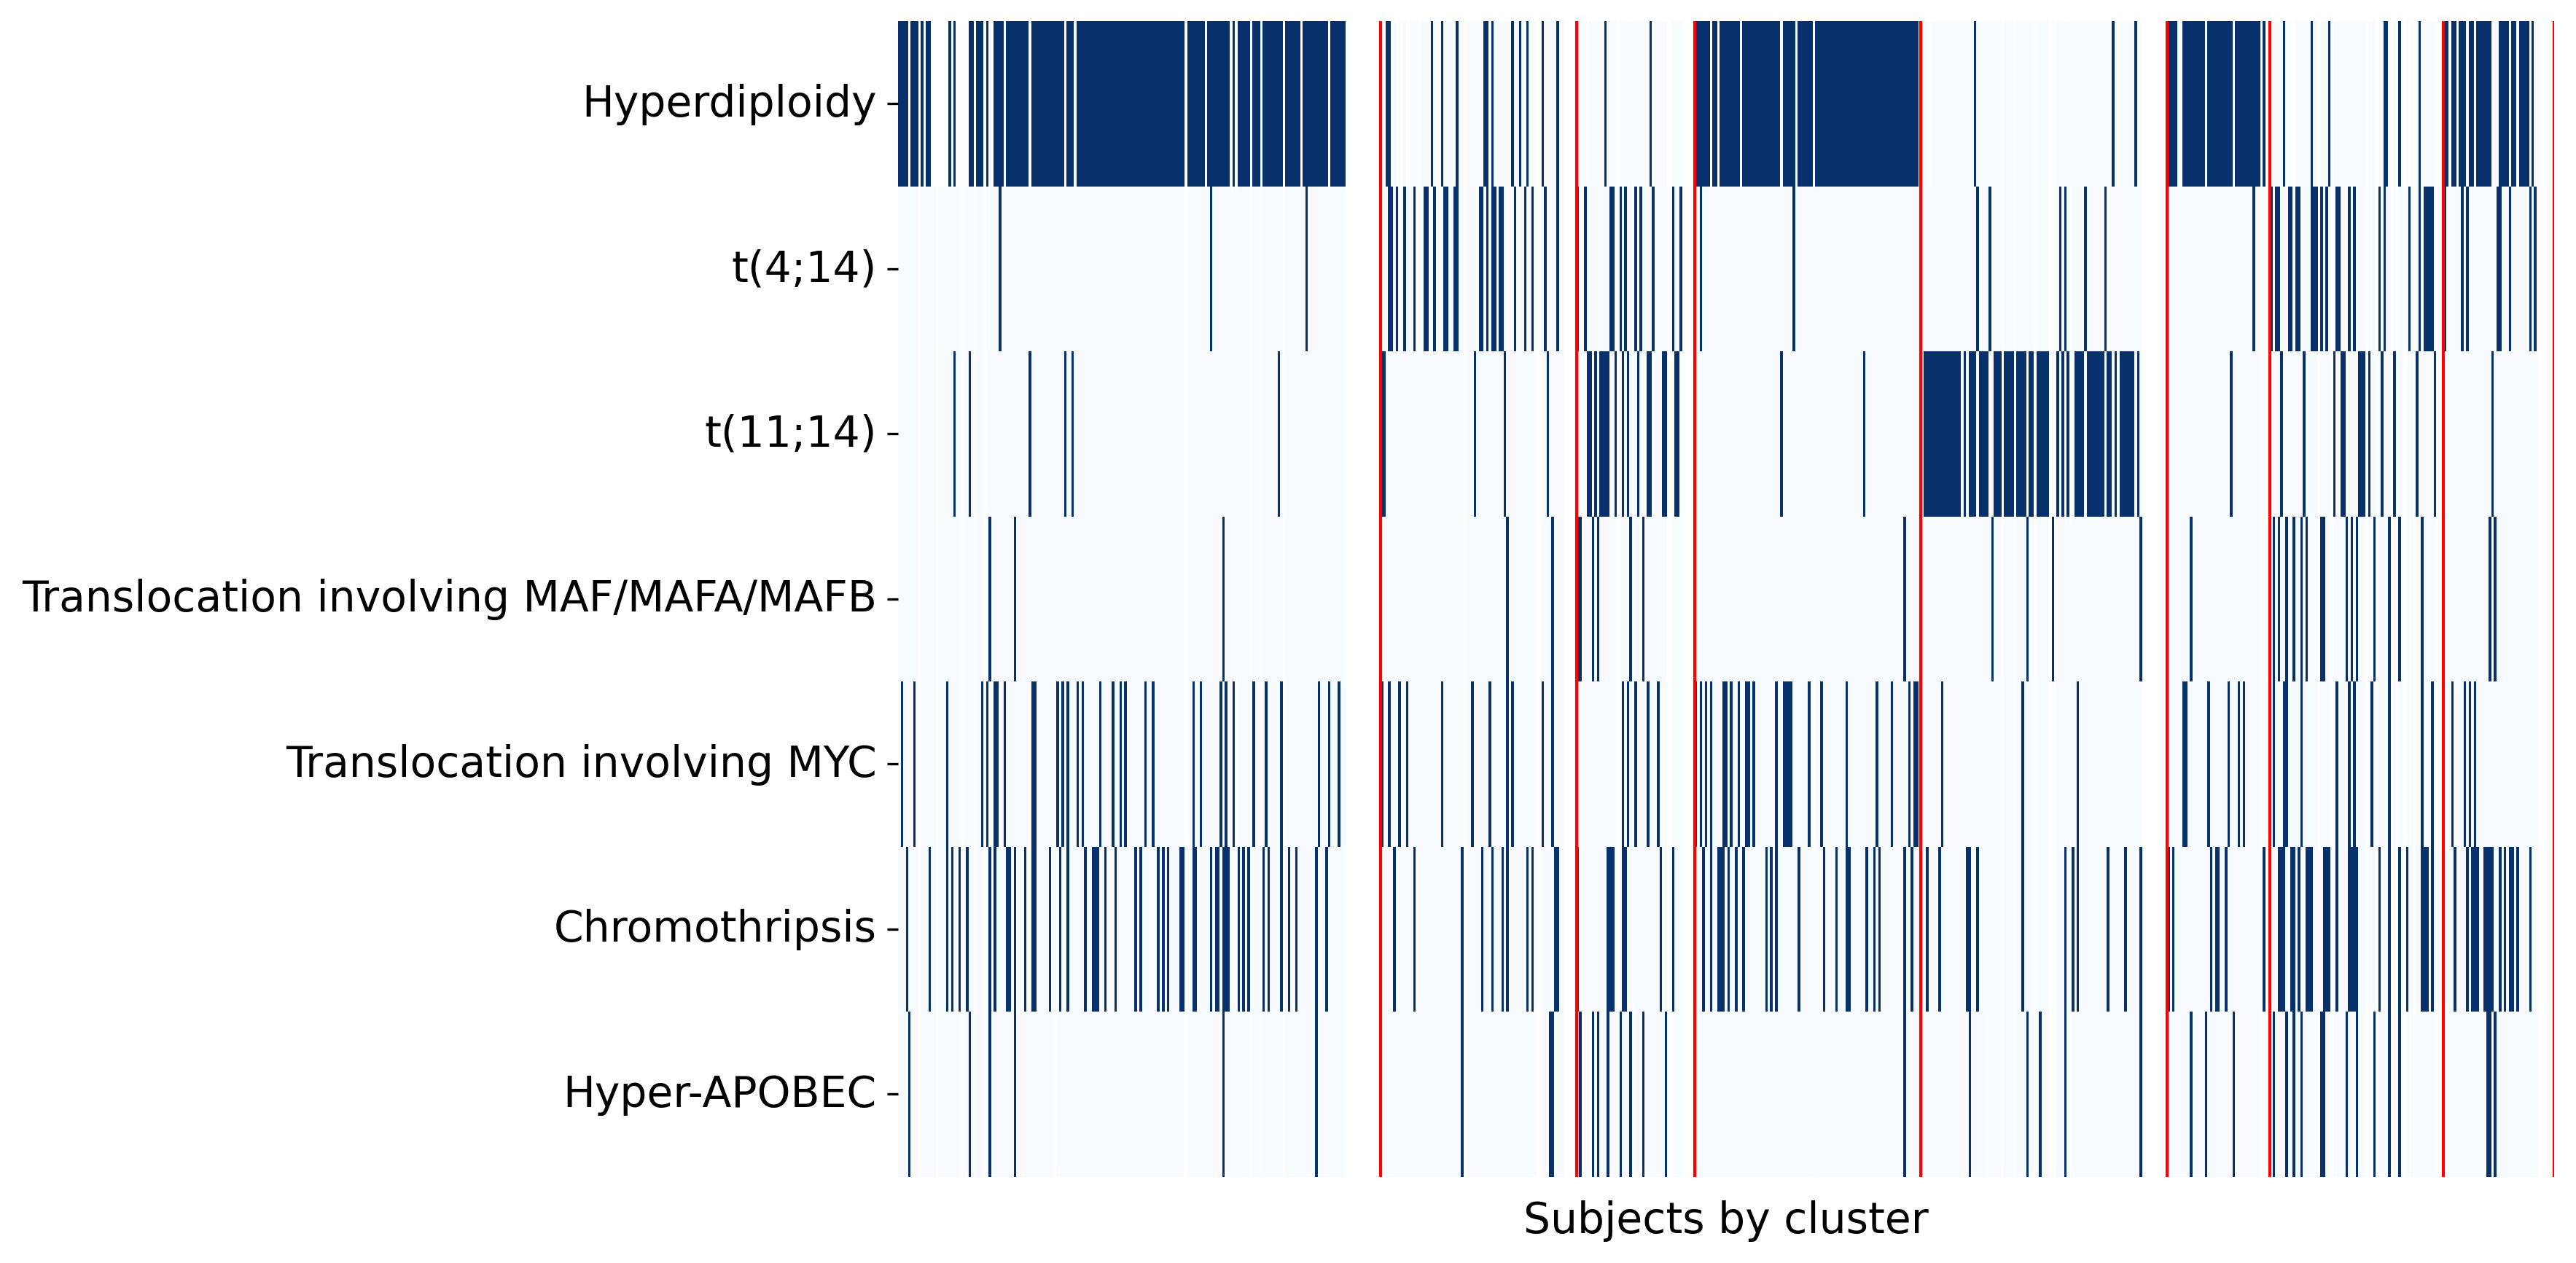

In [109]:
plt.figure(figsize=(12,6), dpi=300)
sns.heatmap(foo, annot=False, fmt='g', cmap='Blues', cbar=False, xticklabels=False)
# plt.title('Fraction of subjects within a cluster with a given attribute') 
# plt.ylabel('')
plt.axvline(x=192, linewidth=1, color="r")
plt.axvline(x=192+78, linewidth=1, color="r")
plt.axvline(x=192+78+47, linewidth=1, color="r")
plt.axvline(x=192+78+47+90, linewidth=1, color="r")
plt.axvline(x=192+78+47+90+98, linewidth=1, color="r")
plt.axvline(x=192+78+47+90+98+41, linewidth=1, color="r")
plt.axvline(x=192+78+47+90+98+41+69, linewidth=1, color="r")
plt.axvline(x=192+78+47+90+98+41+69+44, linewidth=1, color="r")

plt.xlabel('Subjects by cluster') 
plt.tight_layout()
plt.savefig('cluster_heatmap5.png')

In [110]:
gene_cluster_df.T.to_csv('cna_clustering_genomic_factors.csv')

In [111]:
output_df['APOBEC_code']

0    6/167
1     3/70
2     8/36
3     1/88
4     5/81
5     3/38
6    11/58
7     3/38
Name: APOBEC_code, dtype: object

In [112]:
table = np.array([[29, 518-29], [11, 58-11]])                  
oddsr, p  = stats.fisher_exact(table)     

In [113]:
p

0.0009690667332871194

In [114]:
table = np.array([[29, 518, 29], [11, 58, 11]])                  
stat, p, dof, expected = chi2_contingency(table)

In [115]:
p

4.699656910004241e-05

In [116]:
print(len(selected_patient_list))
selected_patient_list_filt = [] 
for subjid in selected_patient_list: 
    selected_patient_list_filt.append(subjid[0:-9])

659


In [117]:
modeling_data_df = secondary_dataset_df[secondary_dataset_df['sample'].isin(selected_patient_list_filt)]
modeling_data_df.insert(2, 'cluster', np.nan)
modeling_data_df = modeling_data_df.reset_index()
selected_patient_list_filt = np.array(selected_patient_list_filt)

In [118]:
for n in range(0, len(modeling_data_df)): 
    location = np.argwhere(selected_patient_list_filt==modeling_data_df['sample'][n])
    location = location[0][0]
    modeling_data_df['cluster'][n] = labels[location]

/var/folders/3j/g7yn2lsj77bgd5fs3b35rlmh0000gn/T/ipykernel_76192/2798674462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modeling_data_df['cluster'][n] = labels[location]


In [119]:
modeling_data_df

,index,sample,chromothripsis_code,cluster,chromothripsis,age,gender,pfs_code,pfs_time,os_code,...,t_CCND1,t_MMSET,t_MAFB,t_MAF,t_CCND3,t_MYC,TPsum,apobec,APOBEC_code,any_MAF
0,1,MMRF_1021_1_BM,0,6.0,0,54.0,FEMALE,1.0,532.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.052916,0.0,0
1,2,MMRF_1029_1_BM,0,0.0,0,46.0,MALE,0.0,995.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.059776,0.0,0
2,3,MMRF_1030_1_BM,0,0.0,0,65.0,FEMALE,1.0,1983.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.088501,0.0,0
3,4,MMRF_1031_1_BM,0,0.0,0,62.0,MALE,1.0,1329.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.039202,0.0,0
4,5,MMRF_1032_1_BM,1,0.0,39,76.0,MALE,1.0,438.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045547,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,742,MMRF_2746_1_BM,0,7.0,0,NaN,NaN,0.0,171.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.084970,0.0,0
575,743,MMRF_2750_1_BM,0,2.0,0,NaN,NaN,0.0,330.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,0.0,0
576,744,MMRF_2751_1_BM,0,2.0,0,NaN,NaN,0.0,142.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
577,747,MMRF_2754_1_BM,0,6.0,0,NaN,NaN,NaN,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0


In [120]:
modeling_data_df.to_csv("cna_modelingdata.csv")